In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
 
# Load the preprocessed data into a Pandas DataFrame 
movies_data = pd.read_csv("imdb_top_1000.csv")
movies_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [2]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [3]:
# Making a copy data for Exploratory Data Analysis without any duplicates
eda_data = movies_data.drop_duplicates()

In [4]:
# Dropping unnecessary columns
eda_data = eda_data.drop(columns=["Poster_Link", "Series_Title", "Overview"])

In [5]:
# Checking for all unique values in the Released_Year column
eda_data["Released_Year"].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [6]:
# Replacing non-year data with null string
eda_data["Released_Year"] = eda_data["Released_Year"].replace("PG", "")

In [7]:
# # Checking for all unique values in the Certificate column
eda_data["Certificate"].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [8]:
# Making new Restricted_Age column from the Certificate column for easier Data Analysis
restricted_age = []
for certificate in eda_data["Certificate"]:
    if certificate in ["A", "R", "TV-MA", "Unrated"]:
        restricted_age.append(18)
    elif certificate in ["16"]:
        restricted_age.append(16)
    elif certificate in ["TV-14"]:
        restricted_age.append(14)
    elif certificate in ["PG-13"]:
        restricted_age.append(13)
    else:
        restricted_age.append(0)
print(restricted_age)

[18, 18, 0, 18, 0, 0, 18, 18, 0, 18, 0, 0, 18, 0, 18, 18, 0, 18, 13, 18, 0, 0, 18, 0, 18, 18, 0, 18, 18, 0, 0, 0, 0, 18, 18, 0, 0, 18, 18, 0, 18, 18, 18, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 18, 18, 0, 0, 18, 18, 18, 18, 18, 0, 0, 18, 0, 18, 0, 0, 0, 18, 18, 0, 0, 18, 13, 18, 14, 0, 18, 0, 0, 0, 18, 0, 0, 0, 0, 18, 18, 0, 18, 0, 18, 18, 0, 18, 18, 0, 18, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 18, 0, 18, 0, 18, 0, 18, 0, 0, 18, 0, 0, 0, 0, 18, 0, 0, 0, 18, 18, 0, 18, 18, 0, 18, 0, 18, 0, 18, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 18, 0, 18, 0, 0, 0, 0, 0, 0, 0, 18, 0, 16, 18, 18, 18, 0, 18, 18, 18, 0, 0, 0, 0, 0, 18, 0, 18, 0, 0, 18, 0, 0, 18, 0, 0, 0, 18, 0, 0, 18, 0, 13, 0, 0, 0, 18, 18, 0, 0, 13, 18, 18, 0, 0, 18, 18, 0, 18, 18, 0, 0, 0, 18, 0, 0, 18, 18, 0, 18, 18, 0, 0, 0, 18, 0, 0, 0, 0, 18, 0, 0, 0, 18, 0, 0, 18, 0, 18, 18, 0, 0, 18, 18, 0, 0, 0, 0, 0, 0, 18, 0, 0, 18, 0, 18, 0, 0, 0, 0, 0,

In [9]:
# Adding the Restricted_Age column and removing the Certificate column
eda_data["Restricted_Age"] = restricted_age
eda_data = eda_data.drop(columns="Certificate")

In [10]:
# Removing "min" from the Runtime column
runtimes_without_min = []
for runtime in eda_data["Runtime"]:
    runtimes_without_min.append(int(runtime.split(' ')[0]))
print(runtimes_without_min)

[142, 175, 152, 202, 96, 201, 154, 195, 148, 139, 178, 142, 161, 179, 136, 146, 124, 133, 160, 132, 153, 169, 130, 125, 169, 189, 116, 127, 118, 121, 133, 207, 130, 122, 106, 112, 130, 151, 150, 155, 119, 106, 110, 88, 137, 155, 89, 116, 165, 109, 102, 87, 87, 126, 125, 147, 106, 161, 117, 181, 149, 105, 165, 164, 170, 165, 98, 137, 101, 113, 134, 229, 115, 146, 147, 117, 122, 143, 95, 116, 88, 112, 110, 125, 119, 104, 139, 160, 115, 123, 131, 132, 112, 153, 108, 122, 104, 102, 122, 126, 89, 81, 178, 99, 116, 142, 137, 160, 170, 131, 149, 114, 129, 136, 149, 132, 228, 125, 136, 128, 103, 143, 89, 107, 119, 117, 153, 68, 143, 138, 156, 130, 115, 132, 167, 96, 163, 146, 87, 186, 321, 134, 135, 129, 140, 138, 96, 180, 153, 158, 118, 103, 132, 167, 122, 140, 210, 156, 119, 135, 156, 107, 138, 128, 170, 178, 160, 130, 127, 142, 86, 132, 162, 129, 162, 99, 177, 204, 91, 172, 129, 110, 179, 121, 91, 96, 118, 105, 136, 88, 138, 126, 99, 95, 45, 122, 136, 130, 106, 145, 139, 160, 137, 118, 122,

In [11]:
# Changing the dtype of the RUntime column from str to int
eda_data["Runtime"] = runtimes_without_min
eda_data["Runtime"].astype(int)

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int64

In [12]:
# Checking for the maximum number of genres N one movie has
max_total_genre = 0
for genre in eda_data["Genre"]:
    max_total_genre = max(max_total_genre, len(genre.split(", ")))
print(max_total_genre)

3


In [13]:
# Splitting the Genre column to N different columns of Genre
genres = []
for num in range(max_total_genre):
    genres.append([])
for genre in eda_data["Genre"]:
    slitted_genre = genre.split(", ")
    for index in range(max_total_genre):
        if (index < len(slitted_genre)):
            genres[index].append(slitted_genre[index])
        else:
            genres[index].append("No Genre")

print(genres)

[['Drama', 'Crime', 'Action', 'Crime', 'Crime', 'Action', 'Crime', 'Biography', 'Action', 'Drama', 'Action', 'Drama', 'Western', 'Action', 'Action', 'Biography', 'Action', 'Drama', 'Biography', 'Comedy', 'Drama', 'Adventure', 'Crime', 'Animation', 'Drama', 'Crime', 'Comedy', 'Crime', 'Crime', 'Action', 'Action', 'Action', 'Drama', 'Crime', 'Drama', 'Biography', 'Drama', 'Crime', 'Biography', 'Action', 'Drama', 'Crime', 'Action', 'Animation', 'Action', 'Drama', 'Animation', 'Adventure', 'Western', 'Horror', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Biography', 'Action', 'Animation', 'Action', 'Animation', 'Action', 'Action', 'Animation', 'Drama', 'Action', 'Comedy', 'Drama', 'Animation', 'Drama', 'Action', 'Mystery', 'Animation', 'Crime', 'Action', 'Drama', 'Drama', 'Horror', 'Drama', 'Crime', 'Comedy', 'Crime', 'Drama', 'Mystery', 'Drama', 'Comedy', 'Drama', 'Drama', 'Crime', 'Crime', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Adventure', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 

In [14]:
# Adding the new columns and removing the old Genre column
for index in range(max_total_genre):
    column_name = "Genre" + str(index + 1)
    eda_data[column_name] = genres[index]
eda_data = eda_data.drop(columns="Genre")

In [15]:
# Fill NaN in the Meta_score column with the mean values
eda_data["Meta_score"] = eda_data["Meta_score"].fillna(value=eda_data["Meta_score"].mean())

In [16]:
# Change the dtype of the Gross column from str to int
eda_data["Gross"] = eda_data["Gross"].fillna(value="")
grosses = []
for gross in eda_data["Gross"]:
        if gross == "":
                grosses.append(np.nan)
        else:
                grosses.append(int("".join(str(gross).split(","))))
print(grosses)

[28341469, 134966411, 534858444, 57300000, 4360000, 377845905, 107928762, 96898818, 292576195, 37030102, 315544750, 330252182, 6100000, 342551365, 171479930, 46836394, 290475067, 112000000, nan, 53367844, nan, 188020017, 7563397, 10055859, 216540909, 136801374, 57598247, 100125643, 130742922, 322740140, nan, 269061, nan, 335451311, 13092000, 13182281, 53089891, 132384315, 32572577, 187705427, 6719864, 23341568, 19501238, 422783777, 204843350, 11990401, nan, 210609762, 5321508, 32000000, 1024560, 163245, 19181, 1661096, nan, nan, 5017246, 12391761, 190241310, 858373000, 678815482, 209726015, 162805434, 448139099, 6532908, 1223869, 223808164, 11286112, 707481, 25544867, 2375308, 5321508, 248159971, 44017374, 83471511, 78900000, nan, nan, 275902, 8175000, nan, 36764313, nan, 288475, 159227644, nan, 1373943, nan, 687185, 7098492, 6857096, nan, nan, 120540719, 34400301, 33225499, 30328156, 3635482, 130096601, 138433435, 933933, 191796233, 75600000, 2832029, 46357676, nan, 85160248, 51973029

In [17]:
# Fill NaN in the Gross column with the mean values
eda_data["Gross"] = grosses
eda_data["Gross"] = eda_data["Gross"].fillna(value=eda_data["Gross"].mean())
eda_data["Gross"].astype(int)

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995     68034750
996     68034750
997     30500000
998     68034750
999     68034750
Name: Gross, Length: 1000, dtype: int64

In [18]:
# Rechecking the information of the clean dataset
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Released_Year   1000 non-null   object 
 1   Runtime         1000 non-null   int64  
 2   IMDB_Rating     1000 non-null   float64
 3   Meta_score      1000 non-null   float64
 4   Director        1000 non-null   object 
 5   Star1           1000 non-null   object 
 6   Star2           1000 non-null   object 
 7   Star3           1000 non-null   object 
 8   Star4           1000 non-null   object 
 9   No_of_Votes     1000 non-null   int64  
 10  Gross           1000 non-null   float64
 11  Restricted_Age  1000 non-null   int64  
 12  Genre1          1000 non-null   object 
 13  Genre2          1000 non-null   object 
 14  Genre3          1000 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 125.0+ KB


In [19]:
# Extracting numeric data for analysis
numeric_data = pd.DataFrame(eda_data[["Runtime", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]])
numeric_data.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,122.891000,7.949300,77.97153,2.736929e+05,6.803475e+07
std,28.093671,0.275491,11.36206,3.273727e+05,1.000371e+08
min,45.000000,7.600000,28.00000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,72.00000,5.552625e+04,5.012919e+06
50%,119.000000,7.900000,77.97153,1.385485e+05,4.238945e+07
75%,137.000000,8.100000,85.25000,3.741612e+05,6.803475e+07
max,321.000000,9.300000,100.00000,2.343110e+06,9.366622e+08


The number of outliers of Runtime is 29.
The skewness of Runtime is 0.41550283083509715.

The number of outliers of IMDB_Rating is 13.
The skewness of IMDB_Rating is 0.5368592389805628.

The number of outliers of Meta_score is 31.
The skewness of Meta_score is 3.752186065305705e-15.

The number of outliers of No_of_Votes is 67.
The skewness of No_of_Votes is 1.2384454419314774.

The number of outliers of Gross is 116.
The skewness of Gross is 0.7690738918284747.



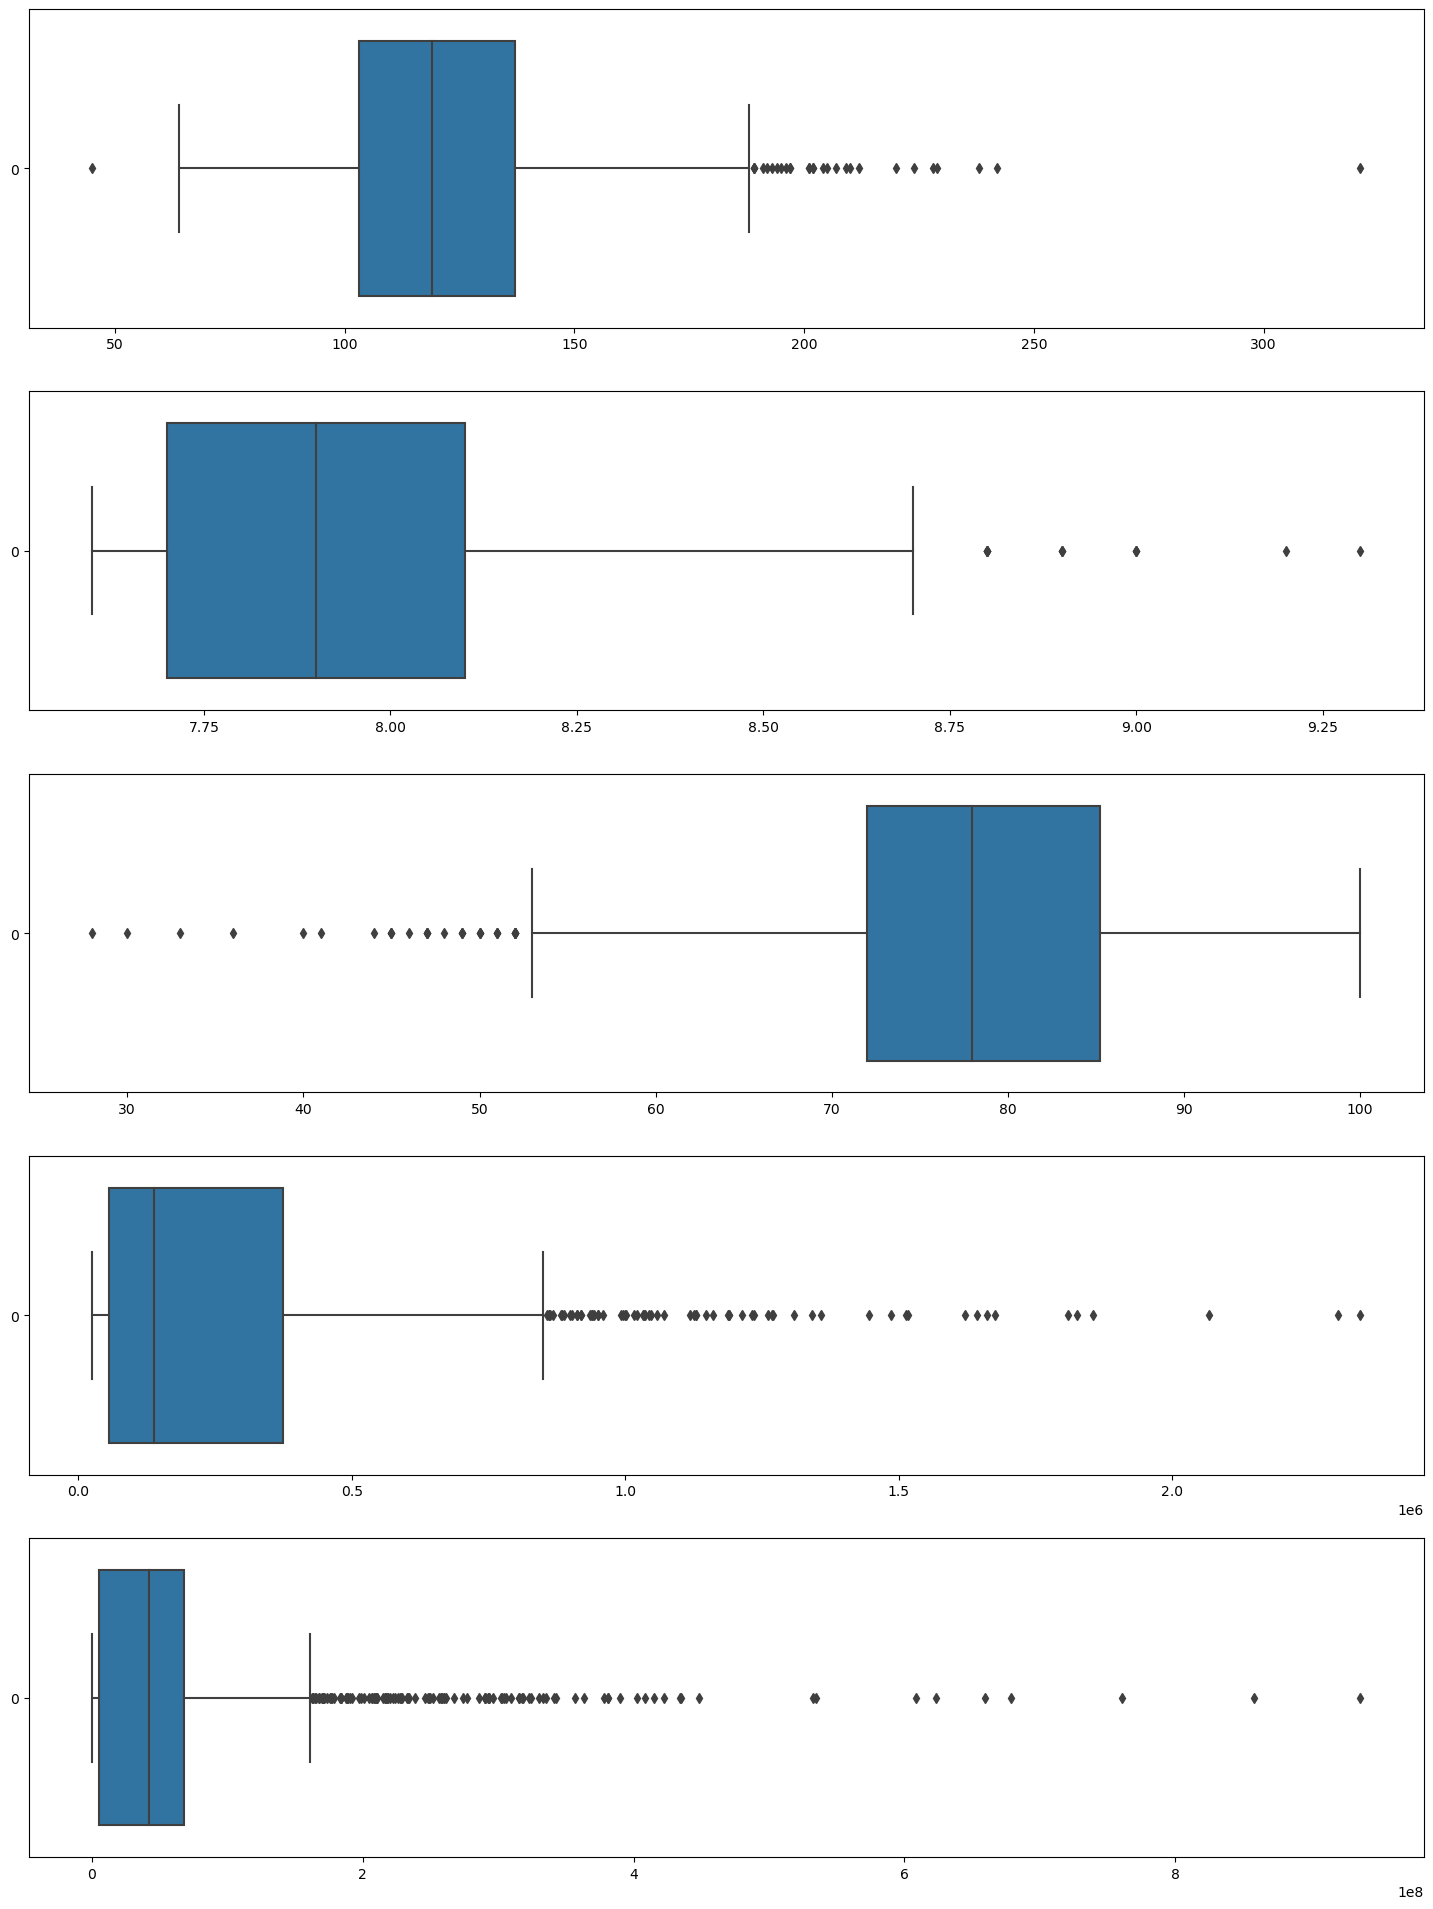

In [20]:
# Boxplotting, counting outliers and calculating skewness of the numeric data
f, axes = plt.subplots(5, 1, figsize=(18, 24))

count = 0
for var in numeric_data:
    #Boxplotting
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count])
    count += 1
    
    #Counting Outliers
    var_data = np.array(numeric_data[var])
    q1, q3 = np.percentile(var_data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = 0
    for num in var_data:
        if num < lower_bound or num > upper_bound:
            outliers += 1
    print(f"The number of outliers of {var} is {outliers}.")
    
    #Calculating Skewness
    mean = numeric_data[var].mean()
    median = numeric_data[var].median()
    std = numeric_data[var].std()
    skewness = 3 * (mean - median) / std
    print(f"The skewness of {var} is {skewness}.")
    
    print()

<Axes: >

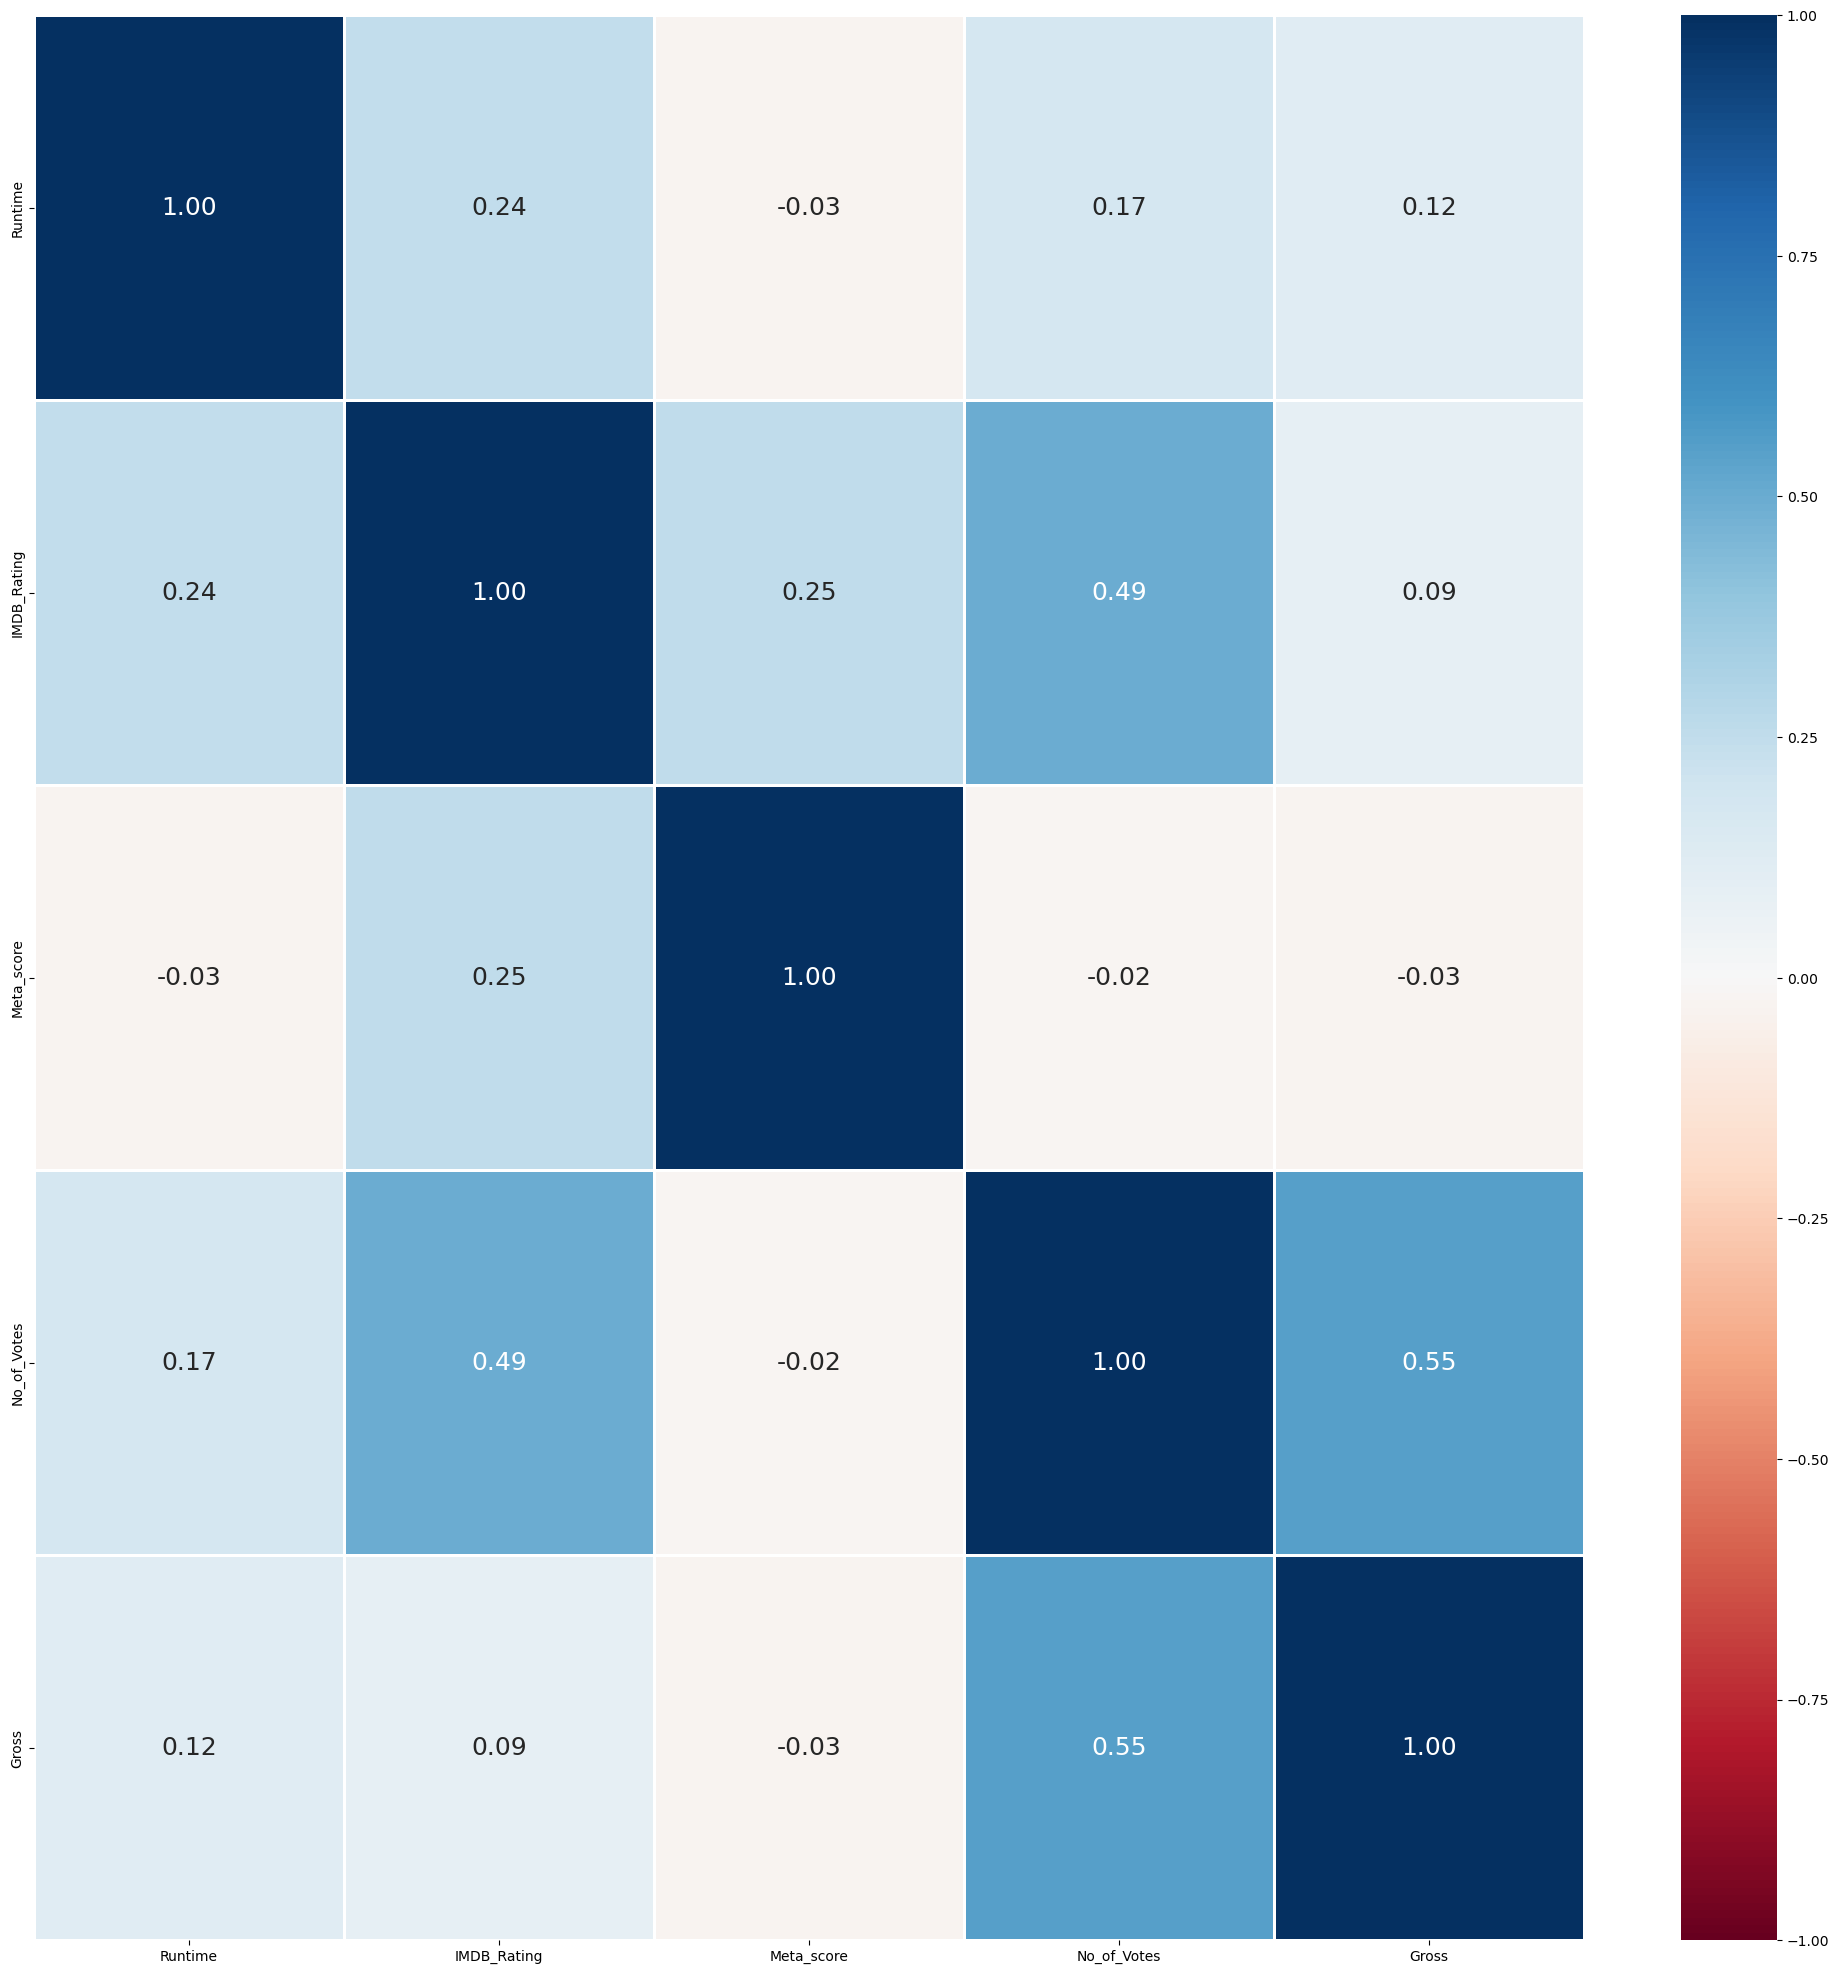

In [21]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(25, 25))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [22]:
# Number of stars in the Dataset
eda_data[["Star1", "Star2", "Star3", "Star4"]].describe()

,Star1,Star2,Star3,Star4
count,1000,1000,1000,1000
unique,660,841,891,939
top,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,12,7,5,4


In [23]:
# Number of directors in the Dataset
eda_data["Director"].describe()

count                 1000
unique                 548
top       Alfred Hitchcock
freq                    14
Name: Director, dtype: object

In [24]:
# Number of genres in the Dataset
eda_data[["Genre1", "Genre2", "Genre3"]].describe()

,Genre1,Genre2,Genre3
count,1000,1000,1000
unique,14,21,20
top,Drama,Drama,No Genre
freq,289,320,354


Number of Genre1 Types : 14
Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: Genre1, dtype: int64


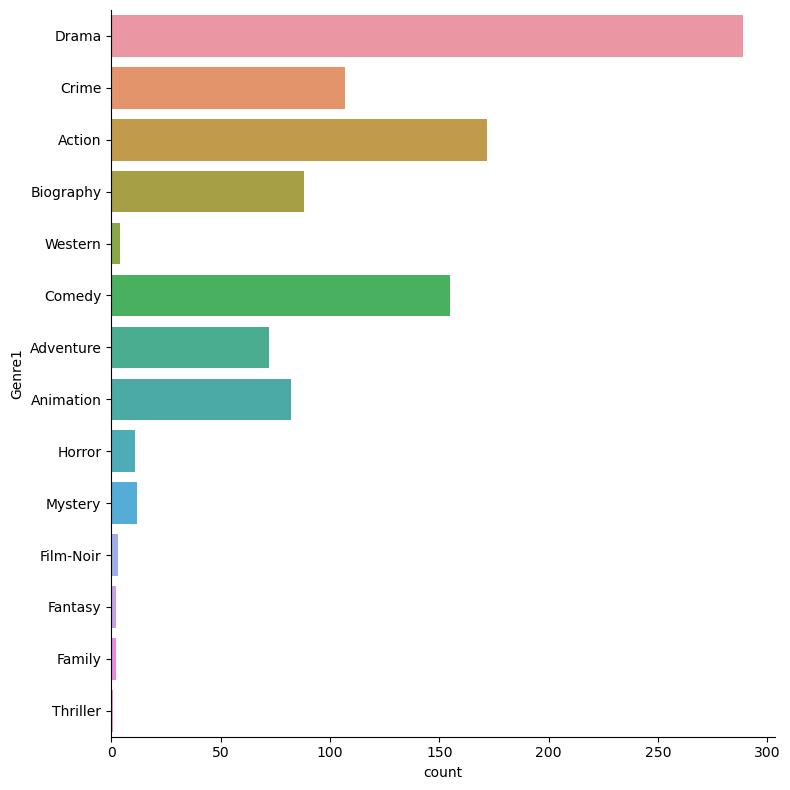

In [25]:
# Genre1 Types in the Dataset
print("Number of Genre1 Types :", len(eda_data["Genre1"].unique()))

# Movies of each Genre1 Type
print(eda_data["Genre1"].value_counts())
sb.catplot(y = "Genre1", data = eda_data, kind = "count", height = 8)

Number of Genre2 Types : 21
Drama        320
Adventure    113
No Genre     105
Crime         84
Romance       53
Comedy        43
Mystery       41
Thriller      37
Family        26
Sci-Fi        23
Music         21
Biography     20
War           18
Horror        18
Fantasy       18
History       18
Action        17
Film-Noir     10
Western        6
Sport          6
Musical        3
Name: Genre2, dtype: int64


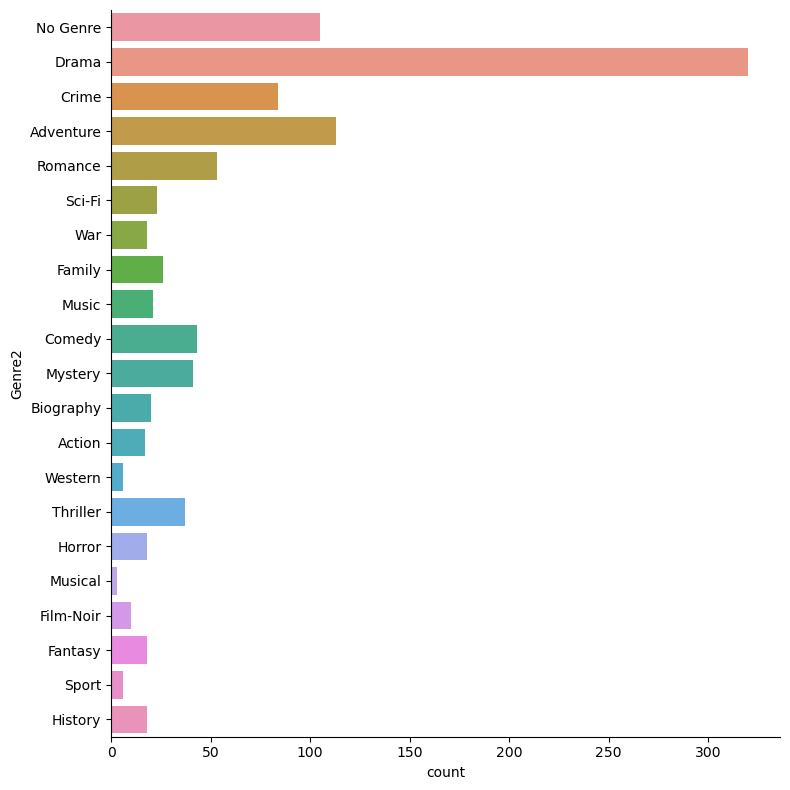

In [26]:
# Genre2 Types in the Dataset
print("Number of Genre2 Types :", len(eda_data["Genre2"].unique()))

# Movies of each Genre2 Type
print(eda_data["Genre2"].value_counts())
sb.catplot(y = "Genre2", data = eda_data, kind = "count", height = 8)

Number of Genre3 Types : 20
No Genre     354
Drama        115
Thriller      99
Romance       72
Fantasy       46
Mystery       46
Sci-Fi        44
History       38
Comedy        35
War           33
Family        28
Crime         18
Music         14
Musical       14
Sport         13
Adventure     11
Western       10
Film-Noir      6
Horror         3
Biography      1
Name: Genre3, dtype: int64


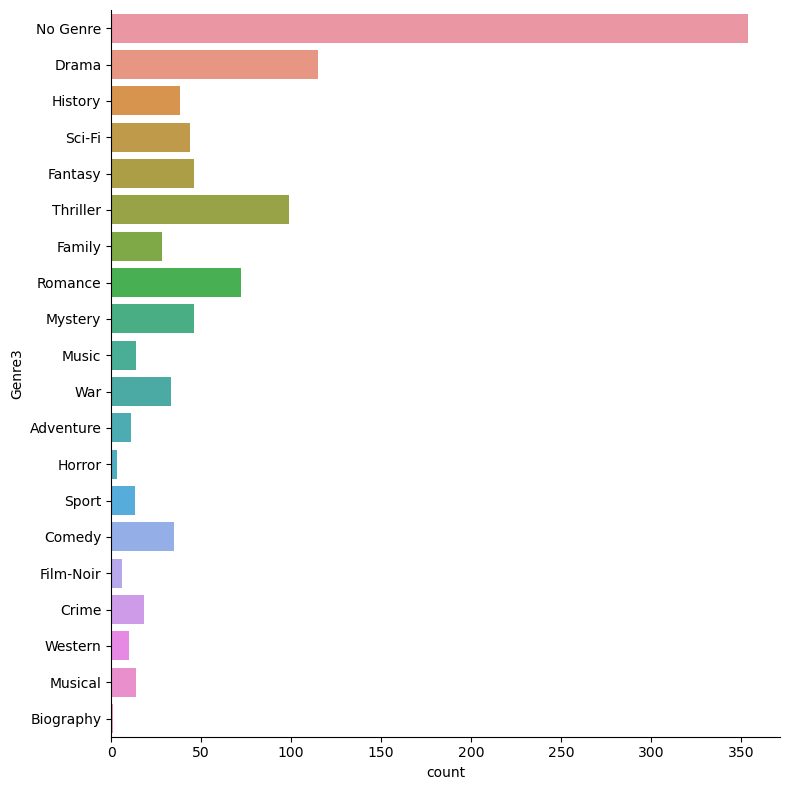

In [27]:
# Genre3 Types in the Dataset
print("Number of Genre3 Types :", len(eda_data["Genre3"].unique()))

# Movies of each Genre3 Type
print(eda_data["Genre3"].value_counts())
sb.catplot(y = "Genre3", data = eda_data, kind = "count", height = 8)

In [28]:
genre_list = [] #list of all genres
movie_genres = movies_data['Genre'].to_list()
for genre in movie_genres:
    for i in genre.split(', '):
        if i not in genre_list:
            genre_list.append(i)
movie_names = movies_data['Series_Title'].to_list() #list of movie names
lower_movie_names = [name.lower() for name in movie_names] #list of movie names in lower case
director_list = movies_data['Director'].to_list() #list of directors
director_list = list(set(director_list)) #removing duplicates in list of directors
lower_director_list = [name.lower() for name in director_list] #list of directors in lower case
movie_actors = movies_data['Star1'].to_list() + movies_data['Star2'].to_list() + movies_data['Star3'].to_list() + movies_data['Star4'].to_list() #list of actors
movie_actors = list(set(movie_actors)) #removing duplicates in list of actors
lower_movie_actors = [name.lower() for name in movie_actors] #list of actors in lower case

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'] #Features to include in model
target_rating = 'IMDB_Rating' #Target variable

X = movies_data[categorical_features]
y = movies_data[target_rating].values

#Transformer for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore') 

#Preprocessor object created using Column Transformer to apply transformations
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)]) 

#Pipeline that transforms the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the model
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [30]:
from difflib import SequenceMatcher

def similarity(a,b): #function to obtain similarity index for identifying typo errors in user input
    seq = SequenceMatcher(a=a,b=b)
    return seq.ratio()

In [31]:
option = ''
target_title = ''
target_genres = []
target_director = ''
target_actors = []
done = False 
while not done: #menu control
    print("Movie Recommendations Algorithm\n")
    user_input = input("1)Search based on title\n2)Search based on genre\n3)Search based on director\n4)Search based on actor\n5)Predict IMDB rating\n6)Quit\ninput: ")
    option = user_input #option for menu
    if user_input == '1': #search for movie title
        movie_title = input("Please input a movie title (case insensitive): ").lower() #requesting user input for movie title
        target_title = movie_title
        if target_title in lower_movie_names: #if found print target movie then exit menu
            print("Movie title found")
            index = lower_movie_names.index(target_title)
            target_title = movie_names[index] #get actual movie name in dataframe with proper capitalisation formatting
            print("Target movie is " + target_title)
            done = True
        else: #not found
            dic = {} 
            for movie in lower_movie_names:
                dic[movie] = similarity(target_title,movie)
            dic = sorted(dic.items(), key = lambda x:x[1], reverse = True) #sorted dictionary of similarity scores of movie names when compared to user input
            guess = movie_names[lower_movie_names.index(dic[0][0])] #asks user if they meant the most similar movie title
            temp = input("Did you mean " + guess + "? Y/N").lower()
            if temp == "y": #if user indicates y or Y then terminate program
                target_title = guess
                index = movie_names.index(target_title)
                target_title = movie_names[index]
                print("Target movie is " + target_title)
                done = True
            else: #else restart menu
                pass
    elif user_input == '2': #search for movie genre
        movie_genre = input("Please input a movie genre (key in -1 to end): ").capitalize() #capitalises first character and changes the rest to lower case
        while movie_genre != '-1': #request user input until user inputs -1
            if movie_genre in genre_list: #if found append
                print("Genre found")
                target_genres.append(movie_genre) 
            else: #if not found
                print("Genre not found")
                dic = {} 
                for genre in genre_list:
                    dic[genre] = similarity(movie_genre,genre)
                dic = sorted(dic.items(), key = lambda x:x[1], reverse = True) #sorted dictionary of similarity scores of movie names when compared to user input
                guess = genre_list[genre_list.index(dic[0][0])]
                temp = input("Did you mean " + guess + "? Y/N").lower()
                if temp == "y": #if user indicates y or Y then terminate program
                    target = guess
                    index = genre_list.index(target)
                    target = genre_list[index]
                    target_genres.append(target)
                else: #else continue asking for genre
                    pass
            movie_genre = input("Please input a movie genre (key in -1 to end): ").capitalize() #capitalises first character and changes the rest to lower case
        string = "Target genres are"
        for genre in target_genres:
            string = string + " " + genre
        print(string)
        done = True
    elif user_input == '3': #search for movie director
        temp = input("Please input a movie director (case insensitive): ").lower() #requesting user input for movie director
        target = temp
        if target in lower_director_list: #if found print target movie then exit menu
            print("Movie director found")
            index = lower_director_list.index(target)
            target_director = director_list[index] #get actual director in dataframe with proper capitalisation formatting
            print("Target director is " + target)
            done = True
        else: #not found
            dic = {} 
            for director in lower_director_list:
                dic[director] = similarity(target,director)
            dic = sorted(dic.items(), key = lambda x:x[1], reverse = True) #sorted dictionary of similarity scores of directors when compared to user input
            guess = director_list[lower_director_list.index(dic[0][0])] #asks user if they meant the most similar director
            temp = input("Did you mean " + guess + "? Y/N").lower()
            if temp == "y": #if user indicates y or Y then terminate program
                target_director = guess
                index = director_list.index(target_director)
                target_director = director_list[index]
                print("Target director is " + target_director)
                done = True
            else: #else restart menu
                pass
    elif user_input == '4': #search for actor
        movie_actor = input("Please input an actor (key in -1 to end): ").lower()
        while movie_actor != '-1':
            if movie_actor in lower_movie_actors: #if found append
                print("Actor found")
                index = lower_movie_actors.index(movie_actor)
                movie_actor = movie_actors[index]
                target_actors.append(movie_actor)
            else: #if not found find similar 
                print("Actor not found")
                dic = {}
                for actor in lower_movie_actors:
                    dic[actor] = similarity(movie_actor,actor)
                dic = sorted(dic.items(), key = lambda x:x[1], reverse = True)
                guess = movie_actors[lower_movie_actors.index(dic[0][0])]
                temp = input("Did you mean " + guess + "? Y/N").lower()
                if temp == "y": #if user indicates y or Y then append 
                    target = guess
                    index = movie_actors.index(target)
                    target = movie_actors[index]
                    target_actors.append(target)
                else: 
                    pass #else continue asking for actor
            movie_actor = input("Please input an actor (key in -1 to end): ").lower()
        string = "Target actors are"
        for actor in target_actors:
            string = string + " " + actor
        print(string)
        done = True
    elif user_input == '5': #Predict IMDB rating
        print("Please provide the following details for the movie:")
        genre = input("Genre: ")
        director = input("Director: ")
        star1 = input("Star 1: ")
        star2 = input("Star 2: ")
        star3 = input("Star 3: ")
        star4 = input("Star 4: ")
        
        new_movie = pd.DataFrame({
            'Genre': [genre],
            'Director': [director],
            'Star1': [star1],
            'Star2': [star2],
            'Star3': [star3],
            'Star4': [star4]
        })
        done = True
    else: #else quit
        done = True

Movie Recommendations Algorithm



In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
if option == '1': #returning similar movies based on movie title
    clean = movies_data.drop(columns = ['Poster_Link']) #removing irrelevant columns as the link to an image of poster does not help in similarity
    for header in clean.columns:
        clean[header] = clean[header].fillna('') #filling nan values in dataframe with '' to avoid any errors when extracting data
    def combined(row):
        return str(row['Series_Title']) + " " + str(row['Released_Year']) + " " + row['Certificate'] + " " + str(row['Runtime']) + " " + row['Genre'] + " " + str(row['IMDB_Rating']) + " " +  row['Overview'] + " " + str(row['Meta_score']) + " " + row['Director'] + " " + row['Star1'] + " " +  row['Star2'] + " " + row['Star3'] + " " + row['Star4'] + " " + str(row['No_of_Votes']) + " " + str(row['Gross'])
    clean['Combined'] = clean.apply(combined,axis = 1) 
    count_vectorizer = CountVectorizer(stop_words = "english") #stop_words = "english" removes filler words like 'the', 'and', 'him' etc.
    count_matrix = count_vectorizer.fit_transform(clean['Combined'])
    cos_sim = cosine_similarity(count_matrix.toarray().tolist())
    similar_movies = list(enumerate(cos_sim[index]))
    sorted_similar_movies = sorted(similar_movies,key = lambda x:x[1],reverse = True)
    for movie in sorted_similar_movies[1:6]: #first item in list is movie itself so print out next 5 movies
        print(movies_data.iloc[movie[0]])
        print('\n')

In [34]:
if option == '2':
    if len(target_genres) == 0: #if no target genres return top 5 movies based on imdb rating
        for i in range(5): #prints first 5 movies since dataframe is already sorted by imdb rating
            print(movies_data.iloc[i])
    else: #if there are target genres
        genres = pd.DataFrame(data = movies_data[["Genre"]])
        for header in genres.columns:
            genres[header] = genres[header].fillna('') #filling nan values in dataframe with '' to avoid any errors when extracting data
        genres['No.'] = 0 #count of genre hits
        for genre in target_genres: #adds 1 to no. if there is a genre hit in each row
            for i in range(len(genres)):
                if genre in genres.iloc[i]['Genre']:
                    genres.loc[i,['No.']] += 1
        sorted_similar_movies = genres.sort_values(by = 'No.',ascending = False)
        for i in range(5):
            print(movies_data.iloc[sorted_similar_movies.index.to_list()[i]])

In [35]:
if option == '3': #returning movies by director
    indexes = []
    directors = pd.DataFrame(data = movies_data[['Director']]) #extracting columns of directors
    for header in directors.columns:
        directors[header] = directors[header].fillna('') #filling nan values in dataframe with '' to avoid any errors when extracting data
    directors = directors['Director'].to_list() #converts directors to list
    for i in range(len(directors)): #search through list of directors and appends index to indexes list
        if directors[i] == target_director:
            indexes.append(i)
    for index in indexes: #prints out all movies by rarget_director
        print(movies_data.iloc[index])
        print('\n')

In [36]:
if option == '4':
    if len(target_actors) == 0: #if no target actors return top 5 movies based on imdb rating
        for i in range(5): #prints first 5 movies since dataframe is already sorted by imdb rating
            print(movies_data.iloc[i])
    else: #if there are target_actors
        actors = pd.DataFrame(data = movies_data[["Star1","Star2","Star3","Star4"]]) #extract actor columns
        for header in actors.columns:
            actors[header] = actors[header].fillna('') #filling nan values in dataframe with '' to avoid any errors when extracting data
            def combined(row):
                return row['Star1'] + " " + row['Star2'] + " " + row['Star3'] + " " + row['Star4']
            actors['Combined'] = actors.apply(combined,axis = 1) #combines all stars into one column
            actors['No.'] = 0 #count of actors
            for actor in target_actors: #adds 1 to no. if there is a match in combined
                for i in range(len(actors)):
                    if actor in actors.iloc[i]['Combined']:
                        actors.loc[i,['No.']] += 1 
        sorted_similar_movies = actors.sort_values(by = 'No.',ascending = False) #sort movies by count
        for i in range(5): #prints out top 5 movies with most actor hits
            print(movies_data.iloc[sorted_similar_movies.index.to_list()[i]])

In [37]:
if option == '5':
    predicted_rating = pipeline.predict(new_movie)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f"Predicted IMDB Rating for the movie is: {predicted_rating[0]:.2f}")